In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Write Script that Pulls csv data from medicare site and saves down to separate folder
def pull_all_2017_datasets(base_url):
    for month_num in list(range(1,13)):
        file_name = "ful2017{}.csv".format(str(month_num))
        pull = pd.read_csv(base_url+file_name)
        pull.to_csv('/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/'+file_name)

In [3]:
# Files Saved; commenting out run file
# pull_all_2017_datasets('http://www.nber.org/data/federal-upper-limits/2017/')

In [4]:
# Explore initial dataset (June 2017)
df = pd.read_csv("/Users/jim_jack/Documents/Mod_3_Project/Mod_3_Project/raw_datasets/ful20176.csv",index_col="Unnamed: 0")

In [5]:
# confirmed no obvious NaN data
df.isna().any()

productgroup                        False
ingredient                          False
strength                            False
dosage                              False
route                               False
mdrunittype                         False
weightedaverageamps                 False
acaful                              False
packagesize                         False
ndc                                 False
arated                              False
multipliergreaterthan175percento    False
year                                False
month                               False
dtype: bool

In [6]:
df.head()

,productgroup,ingredient,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,arated,multipliergreaterthan175percento,year,month
0,7975,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Yes,Y,2017,6
1,4792,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Yes,Y,2017,6
2,4794,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Yes,Y,2017,6
3,4793,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Yes,Y,2017,6
4,4795,OLANZAPINE/FLUOXETINE HYDROCHLORIDE ...,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Yes,Y,2017,6


In [7]:
strip_updated_ingredient = list(map(lambda ingr: ingr.strip(),list(df.ingredient)))
HCL_updated_ingredient = list(map(lambda ingr: ingr.replace('HYDROCHLORIDE','HCL'),strip_updated_ingredient))
HCL_updated_ingredient

['OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'OLANZAPINE/FLUOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'DULOXETINE HCL',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'RALOXIFENE HCL',
 'RALOXIFENE HCL',
 'RALOXIFENE HCL',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'OLANZAPINE',
 'HYDROXYUREA',
 'ENTECAVIR',
 'ENTECAVIR',
 'ENTECAVIR',
 'PRAVASTATIN SODIUM',
 'PRAVASTATIN SODIUM',
 'PRAVASTATIN SODIUM',
 'VALGANCICLOVIR HCL',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'CLONAZEPAM',
 'IBANDRONATE SODIUM',
 'IBANDRONATE SODIUM',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'MYCOPHENOLATE MOFETIL',
 'CAPECITABINE',
 'NAPROXEN SODIUM',
 'NAPROXEN',
 'NAPROXEN',
 'LISINOPRIL',
 'ALENDRONATE SODIUM',
 'FINASTERID

In [8]:
# KEEP ME; UPDATES INGREDIENT LIST; UNCOMMENT WHEN KERNEL IS RERUN; THEN RECOMMENT; OTHERWISE WILL CAUSE DUPS


df['ingredient_normalized'] = HCL_updated_ingredient
df.drop('ingredient',axis=1,inplace=True)
# arated only has 146 negative occurances in 15K+ instances; removed for irrelevancy
df.drop('arated',axis=1,inplace=True)

In [9]:
# function takes a df column and returns a list of unique delimited (/ and ;) values; Lots going on here
def create_unique_ingr_list(df_column):
    local_ingr_list = []
#     Loop through single df column series and delimit values by backslash and semi-colon; creates list_of_lists
    for ingr in df_column:
        local_ingr_list.append(re.split('/|; ',ingr))
#     This line flattens the list of lists, strips away trailing and leading spaces, sets, and sorts alphabetically the drug list
    return sorted(list(set([item.strip() for sublist in local_ingr_list for item in sublist])))



In [10]:
unique_list_of_ingredients = create_unique_ingr_list(HCL_updated_ingredient)
len(unique_list_of_ingredients)

440

In [11]:
add_drugs = pd.DataFrame(columns=unique_list_of_ingredients)

In [12]:
df2 = df.join(add_drugs)

In [13]:
df2.fillna(0,inplace=True)
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sample_update = df2.loc[0:50,['ingredient_normalized','OLANZAPINE','DULOXETINE HCL']]

In [15]:
# proof of filler concept; need to apply across columns
sample_update.OLANZAPINE[sample_update.ingredient_normalized.str.contains('OLANZAPINE',regex=False)] = 1
sample_update

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ingredient_normalized,OLANZAPINE,DULOXETINE HCL
0,OLANZAPINE/FLUOXETINE HCL,1,0
1,OLANZAPINE/FLUOXETINE HCL,1,0
2,OLANZAPINE/FLUOXETINE HCL,1,0
3,OLANZAPINE/FLUOXETINE HCL,1,0
4,OLANZAPINE/FLUOXETINE HCL,1,0
5,DULOXETINE HCL,0,0
6,DULOXETINE HCL,0,0
7,DULOXETINE HCL,0,0
8,DULOXETINE HCL,0,0
9,DULOXETINE HCL,0,0


In [16]:
sample_update_2 = df2.loc[0:50,['ingredient_normalized','OLANZAPINE','DULOXETINE HCL']]

In [17]:
# Proof of concept for updating all columns
for ingr in sample_update_2.columns[1:]:
    sample_update_2[ingr][sample_update.ingredient_normalized.str.contains(ingr,regex=False)] = 1

sample_update_2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ingredient_normalized,OLANZAPINE,DULOXETINE HCL
0,OLANZAPINE/FLUOXETINE HCL,1,0
1,OLANZAPINE/FLUOXETINE HCL,1,0
2,OLANZAPINE/FLUOXETINE HCL,1,0
3,OLANZAPINE/FLUOXETINE HCL,1,0
4,OLANZAPINE/FLUOXETINE HCL,1,0
5,DULOXETINE HCL,0,1
6,DULOXETINE HCL,0,1
7,DULOXETINE HCL,0,1
8,DULOXETINE HCL,0,1
9,DULOXETINE HCL,0,1


In [18]:
# fuctionalization of the above
def fill_ingredient_dummies(df_):
    for ingr in df_.columns[14:]:
        df_[ingr][df_.ingredient_normalized.str.contains(ingr,regex=False)] = 1

In [ ]:
df3 = df2

In [ ]:
df2.head()

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VENLAFAXINE HCL,VERAPAMIL HCL,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,0,0
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,0,0
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,0,0
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,0,0
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fill_ingredient_dummies(df3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
# sample test
df3_sample = df3.iloc[:50,13:]
df3_sample["SUM"] = df3_sample.iloc[:,1:].sum(axis=1)
df3_sample['Multi-Ingredient ?'] = 0
df3_sample.loc[df3_sample['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df3_sample

,ABACAVIR SULFATE,ACAMPROSATE CALCIUM,ACARBOSE,ACETAMIN,ACETAMINOPHEN,ACETAZOLAMIDE,ACITRETIN,ACYCLOVIR,ADAPALENE,ALENDRONATE SODIUM,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# sub sample test
df3_sub_sample = df3_sample.loc[:,['ingredient_normalized','OLANZAPINE','FLUOXETINE HCL']]
df3_sub_sample["SUM"] = df3_sub_sample.iloc[:,1:].sum(axis=1)
df3_sub_sample['Multi-Ingredient ?'] = 0
df3_sub_sample.loc[df3_sub_sample['SUM'] > 1, 'Multi-Ingredient ?'] = 1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [ ]:
df4 = df3

In [ ]:
# Adding in multi-ingredient column
df4["SUM"] = df4.iloc[:,14:].sum(axis=1)
df4['Multi-Ingredient ?'] = 0
df4.loc[df4['SUM'] > 1, 'Multi-Ingredient ?'] = 1
df4

,productgroup,strength,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,...,VORICONAZOLE,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?
0,7975,3MG-25MG ...,CAPSULE,ORAL,CAP,2.276870,7.234670,30.0,2323030,Y,...,0,0,0,0,0,0,0,0,2,1
1,4792,6MG-25MG ...,CAPSULE,ORAL,CAP,2.400121,7.952780,30.0,2323130,Y,...,0,0,0,0,0,0,0,0,2,1
2,4794,12MG-25MG ...,CAPSULE,ORAL,CAP,4.713770,13.129000,30.0,2323230,Y,...,0,0,0,0,0,0,0,0,2,1
3,4793,6MG-50MG ...,CAPSULE,ORAL,CAP,2.758260,9.742670,30.0,2323330,Y,...,0,0,0,0,0,0,0,0,2,1
4,4795,12MG-50MG ...,CAPSULE,ORAL,CAP,3.614041,14.192900,30.0,2323430,Y,...,0,0,0,0,0,0,0,0,2,1
5,5028,20 MG ...,CAPSULE DR,ORAL,CAP,0.239553,0.419218,60.0,2323560,N,...,0,0,0,0,0,0,0,0,1,0
6,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,30.0,2324030,N,...,0,0,0,0,0,0,0,0,1,0
7,5029,30 MG ...,CAPSULE DR,ORAL,CAP,0.242719,0.424758,90.0,2324090,N,...,0,0,0,0,0,0,0,0,1,0
8,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,1000.0,2327004,N,...,0,0,0,0,0,0,0,0,1,0
9,5030,60 MG ...,CAPSULE DR,ORAL,CAP,0.410402,0.718204,30.0,2327030,N,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df4_strength = df4.strength
df4_strength_list = list(map(lambda x: x.replace(" ",""),df4_strength))
len(set(df4_strength_list))

317

In [ ]:
df4_updated_ingredient = list(map(lambda stren: stren.replace(' ',''),list(df4.strength)))
df4['strength_normalized'] = df4_updated_ingredient
df4.drop('strength',axis=1,inplace=True)

In [ ]:
values = df4.strength_normalized.value_counts()
df4_values = values.rename_axis('type').reset_index(name='counts')

In [ ]:
df4_values.sort_values('type')

,type,counts
282,.025MG/24H,4
280,.0375MG/24,4
285,.075MG/24H,4
188,0.005%,9
277,0.005MG,5
105,0.01%,16
163,0.02-3(24),10
272,0.025MG,5
251,0.025MG;2.5MG,6
154,0.03-3MG,10


In [ ]:
df4.ingredient_normalized[df4.strength_normalized == '875MG;125MG']

978      AMOXICILLIN; CLAVULANIC ACID
2485     AMOXICILLIN; CLAVULANIC ACID
2486     AMOXICILLIN; CLAVULANIC ACID
4596     AMOXICILLIN; CLAVULANIC ACID
5919     AMOXICILLIN; CLAVULANIC ACID
5920     AMOXICILLIN; CLAVULANIC ACID
6039     AMOXICILLIN; CLAVULANIC ACID
6040     AMOXICILLIN; CLAVULANIC ACID
7516     AMOXICILLIN; CLAVULANIC ACID
10701    AMOXICILLIN; CLAVULANIC ACID
12531    AMOXICILLIN; CLAVULANIC ACID
12532    AMOXICILLIN; CLAVULANIC ACID
12711    AMOXICILLIN; CLAVULANIC ACID
12712    AMOXICILLIN; CLAVULANIC ACID
Name: ingredient_normalized, dtype: object

Text(0.5, 1.0, 'strength value counts')

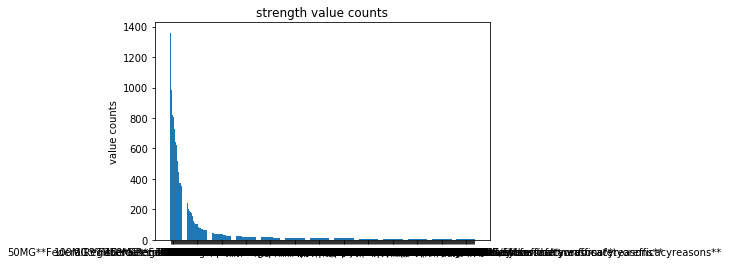

In [ ]:
# Might need to do a log transformation on this data; if i consider it a 
plt.bar(df4_values['type'],df4_values['counts'])
plt.ylabel('value counts')
plt.title('strength value counts')

In [ ]:
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'N'] = 0
df4.multipliergreaterthan175percento[df4.multipliergreaterthan175percento == 'Y'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'class value counts')

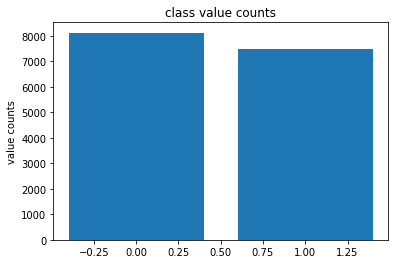

In [ ]:
classification = df4.multipliergreaterthan175percento.value_counts()
df4_class = classification.rename_axis('class').reset_index(name='counts')
plt.bar(df4_class['class'],df4_class['counts'])
plt.ylabel('value counts')
plt.title('class value counts')

In [ ]:
df4.head()

,productgroup,dosage,route,mdrunittype,weightedaverageamps,acaful,packagesize,ndc,multipliergreaterthan175percento,year,...,WARFARIN SODIUM,ZALEPLON,ZIDOVUDINE,ZIPRASIDONE HCL,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,SUM,Multi-Ingredient ?,strength_normalized
0,7975,CAPSULE,ORAL,CAP,2.276870,7.23467,30.0,2323030,1,2017,...,0,0,0,0,0,0,0,2,1,3MG-25MG
1,4792,CAPSULE,ORAL,CAP,2.400121,7.95278,30.0,2323130,1,2017,...,0,0,0,0,0,0,0,2,1,6MG-25MG
2,4794,CAPSULE,ORAL,CAP,4.713770,13.12900,30.0,2323230,1,2017,...,0,0,0,0,0,0,0,2,1,12MG-25MG
3,4793,CAPSULE,ORAL,CAP,2.758260,9.74267,30.0,2323330,1,2017,...,0,0,0,0,0,0,0,2,1,6MG-50MG
4,4795,CAPSULE,ORAL,CAP,3.614041,14.19290,30.0,2323430,1,2017,...,0,0,0,0,0,0,0,2,1,12MG-50MG


In [ ]:
# use onehotencoder tomorrow for categorical variables
# regularization
# ridge, lasso --> (drops completely)
# Google strength normalization 
#     kaggle
#     maybe google scholar?

In [ ]:
# Dosage Data Viz; Is this where you would consider re-sampling?
df4_dosage = df4.dosage.value_counts()
df4_dosage_values = df4_dosage.rename_axis('dosage').reset_index(name='counts')
df4_dosage_values
# plt.bar(df4_dosage_values['dosage'],df4_dosage_values['counts'])
# plt.ylabel('value counts')
# plt.title('dosage value counts')

,dosage,counts
0,TABLET,10957
1,CAPSULE,1779
2,"TABLET, EXTENDED RELEASE",622
3,"CAPSULE, EXTENDED RELEASE",262
4,TAB ER 24H,174
5,"TABLET, ORALLY DISINTEGRATING",147
6,"TABLET, DELAYED RELEASE",137
7,"CAPSULE, DELAYED REL PELLETS",137
8,CAPSULE DR,132
9,TAB CHEW,93


In [ ]:
# Route Data Viz; resampling?
df4_route = df4.route.value_counts()
df4_route_values = df4_route.rename_axis('route').reset_index(name='counts')
df4_route_values
# plt.bar(df4_route_values['route'],df4_route_values['counts'])
# plt.ylabel('value counts')
# plt.title('route value counts')

,route,counts
0,ORAL,15171
1,TOPICAL,134
2,TRANSDERMAL,77
3,OPHTHALMIC,69
4,ORAL-28,51
5,TRANSDERM,37
6,RECTAL,20
7,SUBLINGUAL,19
8,NASAL,13
9,"ORAL, RECTAL",8


In [ ]:
# mdrunittype Data Viz; resampling?
df4_mdrunittype = df4.mdrunittype.value_counts()
df4_mdrunittype_values = df4_mdrunittype.rename_axis('mdrunittype').reset_index(name='counts')
df4_mdrunittype_values
# plt.bar(df4_mdrunittype_values['mdrunittype'],df4_mdrunittype_values['counts'])
# plt.ylabel('value counts')
# plt.title('mdrunittype value counts')

,mdrunittype,counts
0,TAB,12480
1,CAP,2546
2,ML,349
3,TDP,109
4,GM,105
5,SUP,15
6,EA,14


In [ ]:
df5 = pd.get_dummies(df4,columns=["dosage"])

In [ ]:
df6 = pd.get_dummies(df5,columns=['route'])

In [ ]:
df7 = pd.get_dummies(df6,columns=['strength_normalized'])

In [ ]:
df8 = pd.get_dummies(df7,columns=['mdrunittype'])

In [ ]:
# most common ingredient
# ingredient combinations

In [ ]:
data_for_model = df8.drop(['productgroup','ndc','year','month','ingredient_normalized'],axis=1)

In [ ]:
data_for_model.head()

,weightedaverageamps,acaful,packagesize,multipliergreaterthan175percento,ABACAVIR SULFATE,ACAMPROSATE CALCIUM,ACARBOSE,ACETAMIN,ACETAMINOPHEN,ACETAZOLAMIDE,...,strength_normalized_9.5MG/24HR,strength_normalized_90MG,strength_normalized_9MG,mdrunittype_CAP,mdrunittype_EA,mdrunittype_GM,mdrunittype_ML,mdrunittype_SUP,mdrunittype_TAB,mdrunittype_TDP
0,2.276870,7.23467,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.400121,7.95278,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.713770,13.12900,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2.758260,9.74267,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.614041,14.19290,30.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = data_for_model.drop(['multipliergreaterthan175percento'],axis=1)
y = data_for_model.multipliergreaterthan175percento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [ ]:
#original setup --> logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
logreg = LogisticRegression()
model_1 = logreg.fit(X_train,y_train)
model_1

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

In [ ]:
model_1_accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Initial Model Accuracy: "+str(model_1_accuracy))

y_test.value_counts()
y_test.mean()
1 - y_test.mean()
null_accuacy_general = y_test.value_counts().head(1) / len(y_test)

print("Null Accuracy: "+str(null_accuacy_general))
print("F1 Score: "+str(metrics.f1_score(y_test,y_pred_test)))
print("Recall Score: "+str(metrics.recall_score(y_test,y_pred_test)))
print("Precision Score: "+str(metrics.precision_score(y_test,y_pred_test)))


Initial Model Accuracy: 0.9336747759282971
Null Accuracy: 0    0.515237
Name: multipliergreaterthan175percento, dtype: float64
F1 Score: 0.9310986964618249
Recall Score: 0.9244585314315901
Precision Score: 0.9378349410503751


In [ ]:
# import numpy as np
# np.random.seed(0)
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(data_for_model), columns=data_for_model.columns)
# scaled_df.head()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

In [ ]:
adaboost_clf.fit(X_train, y_train.astype(int))
gbt_clf.fit(X_train, y_train.astype(int))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [ ]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7635960044395117
F1-Score: 0.784160885493803

Model: Gradient Boosted Trees
Accuracy: 0.8312131819346026
F1-Score: 0.8403456351449566

Testing Metrics
Model: AdaBoost
Accuracy: 0.7651728553137004
F1-Score: 0.7879768786127167

Model: Gradient Boosted Trees
Accuracy: 0.8320102432778489
F1-Score: 0.8430622009569377


In [ ]:
# >>> from sklearn import svm, datasets
# >>> from sklearn.model_selection import GridSearchCV
# >>> iris = datasets.load_iris()
# >>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# >>> svc = svm.SVC(gamma="scale")
# >>> clf = GridSearchCV(svc, parameters, cv=5)
# >>> clf.fit(iris.data, iris.target)

In [ ]:
# SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Think about running through different kernels with GridSearchCV
SVM_method = svm.SVC(kernel='rbf')
svm_model = SVM_method.fit(X_train,y_train)
svm_model

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

In [ ]:
print("Training Metrics")
display_acc_and_f1_score(y_train, y_pred_train_svm, model_name='rbf SVM')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, y_pred_test_svm, model_name='rbf SVM')